In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

CLEANING DATA

In [ ]:
df=pd.read_csv('crop_production.csv')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
df.isnull().sum()


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
df=df.dropna()
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df['Yield'] = (df['Production'] / df['Area'])
df

<ipython-input-6-2de0f0efc5d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = (df['Production'] / df['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848


In [ ]:
df['State_Name'].nunique()

33

In [ ]:
df=df.drop(['District_Name'],axis=1)
df=df.drop(['Yield'],axis=1)
df

,State_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...
246086,West Bengal,2014,Summer,Rice,306.0,801.0
246087,West Bengal,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,2014,Winter,Rice,279151.0,597899.0


In [ ]:
X=df.iloc[:,:-1]
df2=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X

,State_Name,Crop_Year,Season,Crop,Area
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.0
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,2.0
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.0
...,...,...,...,...,...
246086,West Bengal,2014,Summer,Rice,306.0
246087,West Bengal,2014,Summer,Sesamum,627.0
246088,West Bengal,2014,Whole Year,Sugarcane,324.0
246089,West Bengal,2014,Winter,Rice,279151.0


In [ ]:
y

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 242361, dtype: float64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

#ct=ColumnTransformer(transformers=[('encoder', LabelEncoder(), [0,2,3])],remainder='passthrough')
ct=LabelEncoder()
#X=np.array(ct.fit_transform(X))
X['State_Name']=ct.fit_transform(X['State_Name'])
X['Season']=ct.fit_transform(X['Season'])
X['Crop']=ct.fit_transform(X['Crop'])

In [ ]:
X=np.array(X)
F=pd.DataFrame(X)
F

,0,1,2,3,4
0,0.0,2000.0,1.0,2.0,1254.0
1,0.0,2000.0,1.0,74.0,2.0
2,0.0,2000.0,1.0,95.0,102.0
3,0.0,2000.0,4.0,7.0,176.0
4,0.0,2000.0,4.0,22.0,720.0
...,...,...,...,...,...
242356,32.0,2014.0,3.0,95.0,306.0
242357,32.0,2014.0,3.0,102.0,627.0
242358,32.0,2014.0,4.0,106.0,324.0
242359,32.0,2014.0,5.0,95.0,279151.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:

from sklearn.ensemble import RandomForestRegressor


rfr=RandomForestRegressor(n_estimators=11)


In [ ]:
rfr.fit(X_train,y_train)


RandomForestRegressor(n_estimators=11)

In [ ]:
rfr.score(X_test,y_test)

0.976613760645788

In [ ]:

y_pred=rfr.predict(X_test)
y_pred

array([4572.92727273,  853.90909091, 2372.72727273, ...,   94.05454545,
        467.        ,   57.76363636])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


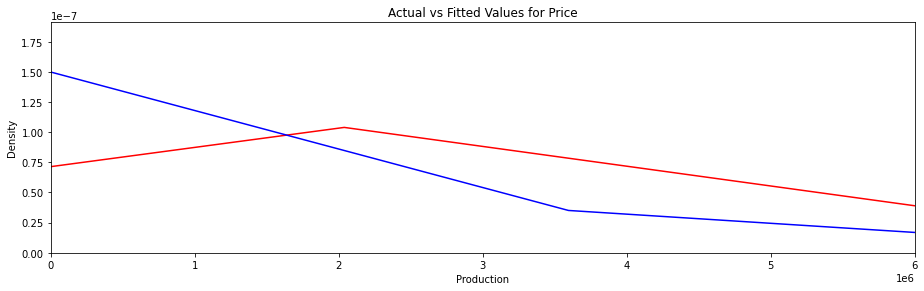

In [ ]:
import seaborn as sns
#plt.figure(figsize=(5,7))

ax2 = plt.axes([2, 2, 2, 0.8], facecolor='w')
ax = sns.distplot(y, hist=False, color="r", label="Actual Value",ax=ax2)
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax2)
ax.set_xlim(0,6000000)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfr , X = X_train, y=y_train)
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 90.07%
Standard Deviation : 3.01%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
joblib.dump(rfr, "./agri_pred.h")

In [ ]:

pd.DataFrame(X_test)
trial=X_test[0]
t2= pd.DataFrame(trial).transpose()
t2

,0,1,2,3,4
0,27.0,2001.0,1.0,116.0,10111.0


In [ ]:
rfr.predict(t2)

array([4572.92727273])